In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage import io, color

In [2]:
# Cargar la imagen 
image_path = "dog.jpeg"  

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


In [3]:
# Convertir a binario (Umbralización)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

In [4]:
# Aplicar esqueletización
skeleton = skeletonize(binary_image > 0)

In [5]:
# Transformada de distancia desde el borde
distance_transform = cv2.distanceTransform(binary_image, cv2.DIST_L2, 5)

In [6]:
# Transformada de distancia desde el esqueleto
skeleton_distance = cv2.distanceTransform(skeleton.astype(np.uint8), cv2.DIST_L2, 5)


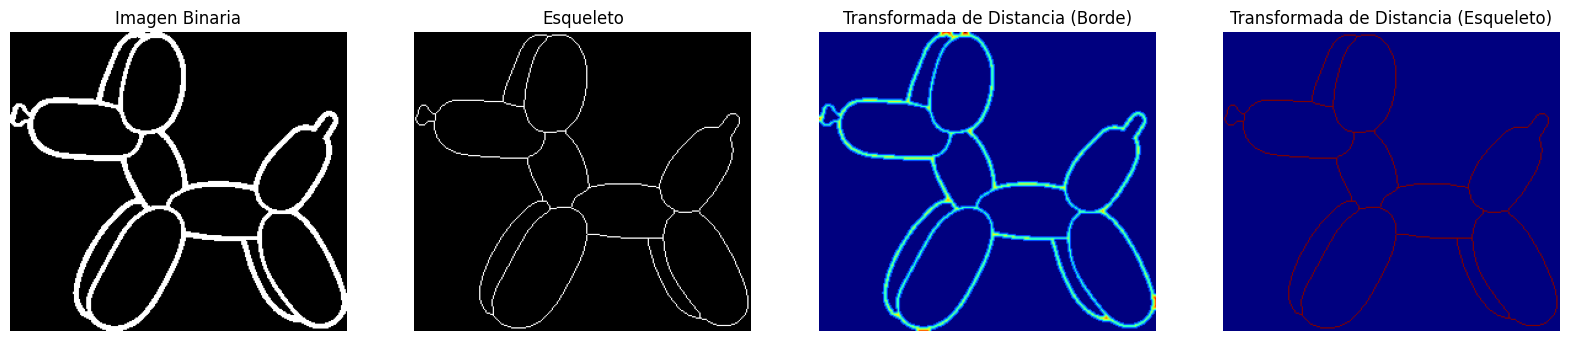

In [7]:
# Mostrar los resultados
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(binary_image, cmap='gray')
axes[0].set_title('Imagen Binaria')
axes[1].imshow(skeleton, cmap='gray')
axes[1].set_title('Esqueleto')
axes[2].imshow(distance_transform, cmap='jet')
axes[2].set_title('Transformada de Distancia (Borde)')
axes[3].imshow(skeleton_distance, cmap='jet')
axes[3].set_title('Transformada de Distancia (Esqueleto)')

for ax in axes:
    ax.axis('off')

plt.show()


In [8]:
from skimage.morphology import thin

In [9]:
# Aplicar una versión mejorada del esqueleto con poda para eliminar ramificaciones
def prune_skeleton(skeleton, iterations=5):
    """
    Elimina ramificaciones no deseadas del esqueleto aplicando un proceso de poda iterativa.
    """
    skel = skeleton.copy()
    for _ in range(iterations):
        # Detectar los puntos terminales (píxeles con un solo vecino)
        neighbors = cv2.filter2D(skel.astype(np.uint8), -1, np.array([[1, 1, 1], [1, 10, 1], [1, 1, 1]]))
        endpoints = (neighbors == 11)  # Puntos con solo un vecino
        skel[endpoints] = 0  # Eliminar puntos terminales
    return skel

In [10]:
# Aplicar poda al esqueleto obtenido previamente
pruned_skeleton = prune_skeleton(skeleton)

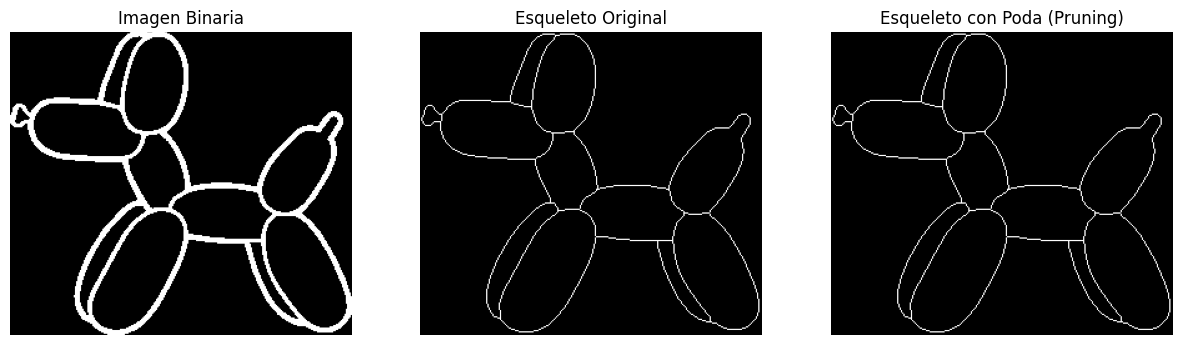

In [11]:
# Mostrar el resultado antes y después de la poda
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(binary_image, cmap='gray')
axes[0].set_title("Imagen Binaria")
axes[1].imshow(skeleton, cmap='gray')
axes[1].set_title("Esqueleto Original")
axes[2].imshow(pruned_skeleton, cmap='gray')
axes[2].set_title("Esqueleto con Poda (Pruning)")

for ax in axes:
    ax.axis("off")

plt.show()